Project Title:
#  Marketing Campaign for Banking Products

1)Importing the datasets and libraries, check datatype, statistical summary shape, null values etc

In [67]:
import pandas as pd                
import numpy as np                  
import seaborn as sns               
import matplotlib.pyplot as plt    
%matplotlib inline
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,auc,roc_auc_score
sns.set_style("white")               # The plots color style is set to 'white'
pd.options.mode.chained_assignment = None

Uploading the local data file


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling.csv


In [3]:
dc = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df = pd.DataFrame(dc)

To check the first five elements in the dataset

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


To know the last 5 elements

In [5]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


 DataFrame df's datatypes,columns,Non-Null Count,etc

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [9]:
df.shape

(5000, 14)

In [10]:
print(df.index)
print('')
print(df.columns)

RangeIndex(start=0, stop=5000, step=1)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


In [11]:
df[df.isnull()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [12]:
df[df<0].count()

ID                     0
Age                    0
Experience            52
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
dtype: int64

**2)Checking if we need any data cleaning:**

In [13]:
df[df['Experience'] < 0]['Experience'].count()

52

In [14]:
lmdvalue = int(df['Experience'].median())
for i in range(len(df)):
    if df['Experience'].iloc[i] < 0:
       df['Experience'].iloc[i] = lmdvalue

In [15]:
df[df['Experience'] < 0]['Experience'].count()

0

In [16]:
df.set_index(['ID'], inplace=True)
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [18]:
df.columns = [i.lower() for i in df.columns]
df.columns

Index(['age', 'experience', 'income', 'zip code', 'family', 'ccavg',
       'education', 'mortgage', 'personal loan', 'securities account',
       'cd account', 'online', 'creditcard'],
      dtype='object')

Explanatory Data Analysis(EDA)

**Finding out the unique data:**

In [19]:
df.apply(lambda x: len(x.unique()))

age                    45
experience             44
income                162
zip code              467
family                  4
ccavg                 108
education               3
mortgage              347
personal loan           2
securities account      2
cd account              2
online                  2
creditcard              2
dtype: int64

In [24]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['age', 'experience', 'income', 'zip code', 'family', 'ccavg',
       'education', 'mortgage', 'personal loan', 'securities account',
       'cd account', 'online', 'creditcard'],
      dtype='object')

**Number of people with zero mortgage?**

In [25]:
df[df['mortgage'] == 0]['mortgage'].count()

3462

**Number of people with zero credit card spending per month**

In [26]:
df[df['ccavg'] == 0]['ccavg'].count()

106

**Value counts of all categorical columns.**

In [27]:
df['education'].value_counts()

1    2096
3    1501
2    1403
Name: education, dtype: int64

In [28]:
df['personal loan'].value_counts()

0    4520
1     480
Name: personal loan, dtype: int64

In [29]:
df['securities account'].value_counts()

0    4478
1     522
Name: securities account, dtype: int64

In [30]:
df['cd account'].value_counts()

0    4698
1     302
Name: cd account, dtype: int64

In [31]:
df['online'].value_counts()

1    2984
0    2016
Name: online, dtype: int64

In [32]:
df['creditcard'].value_counts()

0    3530
1    1470
Name: creditcard, dtype: int64

In [33]:
df_ser = df[['personal loan', 'securities account', 'cd account', 'online', 'creditcard']]
df_serg= df_ser.groupby('personal loan').sum()
df_serg

,securities account,cd account,online,creditcard
personal loan,,,,
0,462,162,2693,1327
1,60,140,291,143


In [34]:
df_serg.describe().T

,count,mean,std,min,25%,50%,75%,max
securities account,2.0,261.0,284.256926,60.0,160.5,261.0,361.5,462.0
cd account,2.0,151.0,15.556349,140.0,145.5,151.0,156.5,162.0
online,2.0,1492.0,1698.470488,291.0,891.5,1492.0,2092.5,2693.0
creditcard,2.0,735.0,837.214429,143.0,439.0,735.0,1031.0,1327.0


**Univariate Analysis**

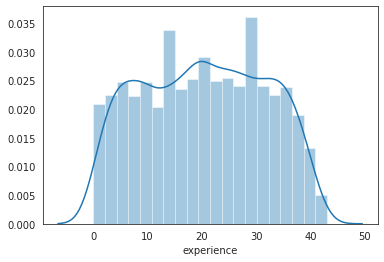

In [35]:
#experimenting with all types of commands for univariate analysis
sns.distplot(df.experience.dropna(), kde=True);

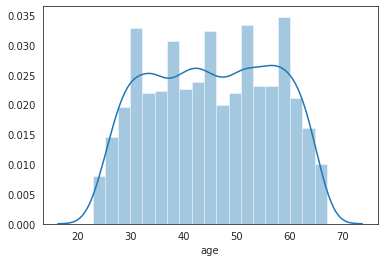

In [36]:
sns.distplot(df['age'], kde=True);

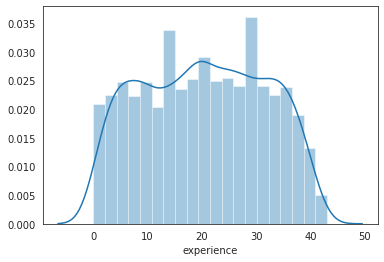

In [37]:
sns.distplot(df['experience']);

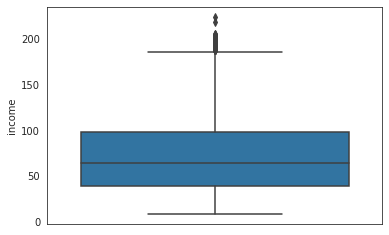

In [38]:
sns.boxplot(df['income'], orient='vertical');

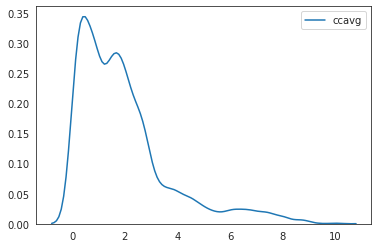

In [39]:
sns.kdeplot(df['ccavg']);

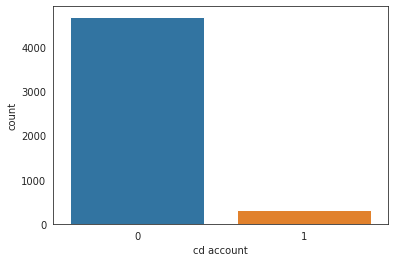

In [40]:
sns.countplot(df['cd account']);

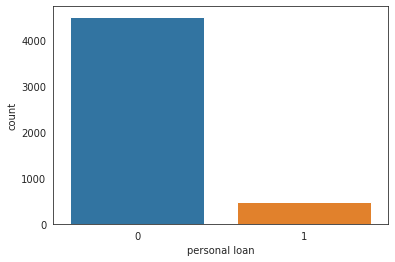

In [41]:
sns.countplot(df['personal loan']);

**Bivariate Analysis**

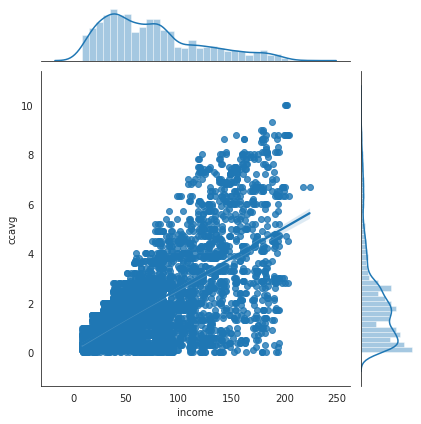

In [42]:
sns.jointplot(x='income',y='ccavg',data=df,kind='reg');

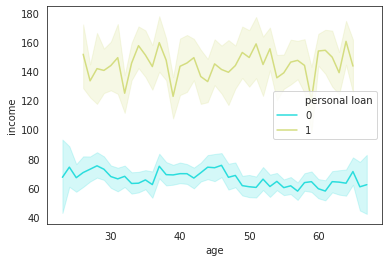

In [43]:
sns.lineplot(x="age", y="income", hue='personal loan', data=df,palette='rainbow');

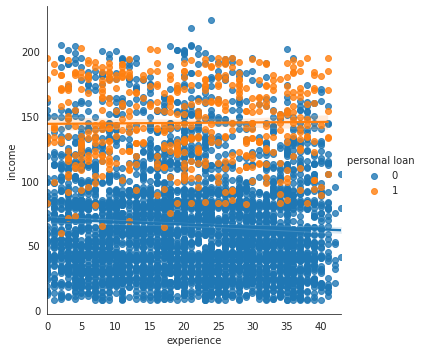

In [44]:
sns.lmplot(x='experience', y='income', hue='personal loan', data=df);

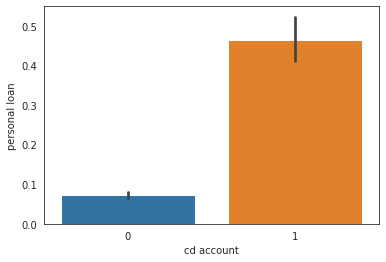

In [45]:
sns.barplot(x='cd account', y='personal loan', data=df);

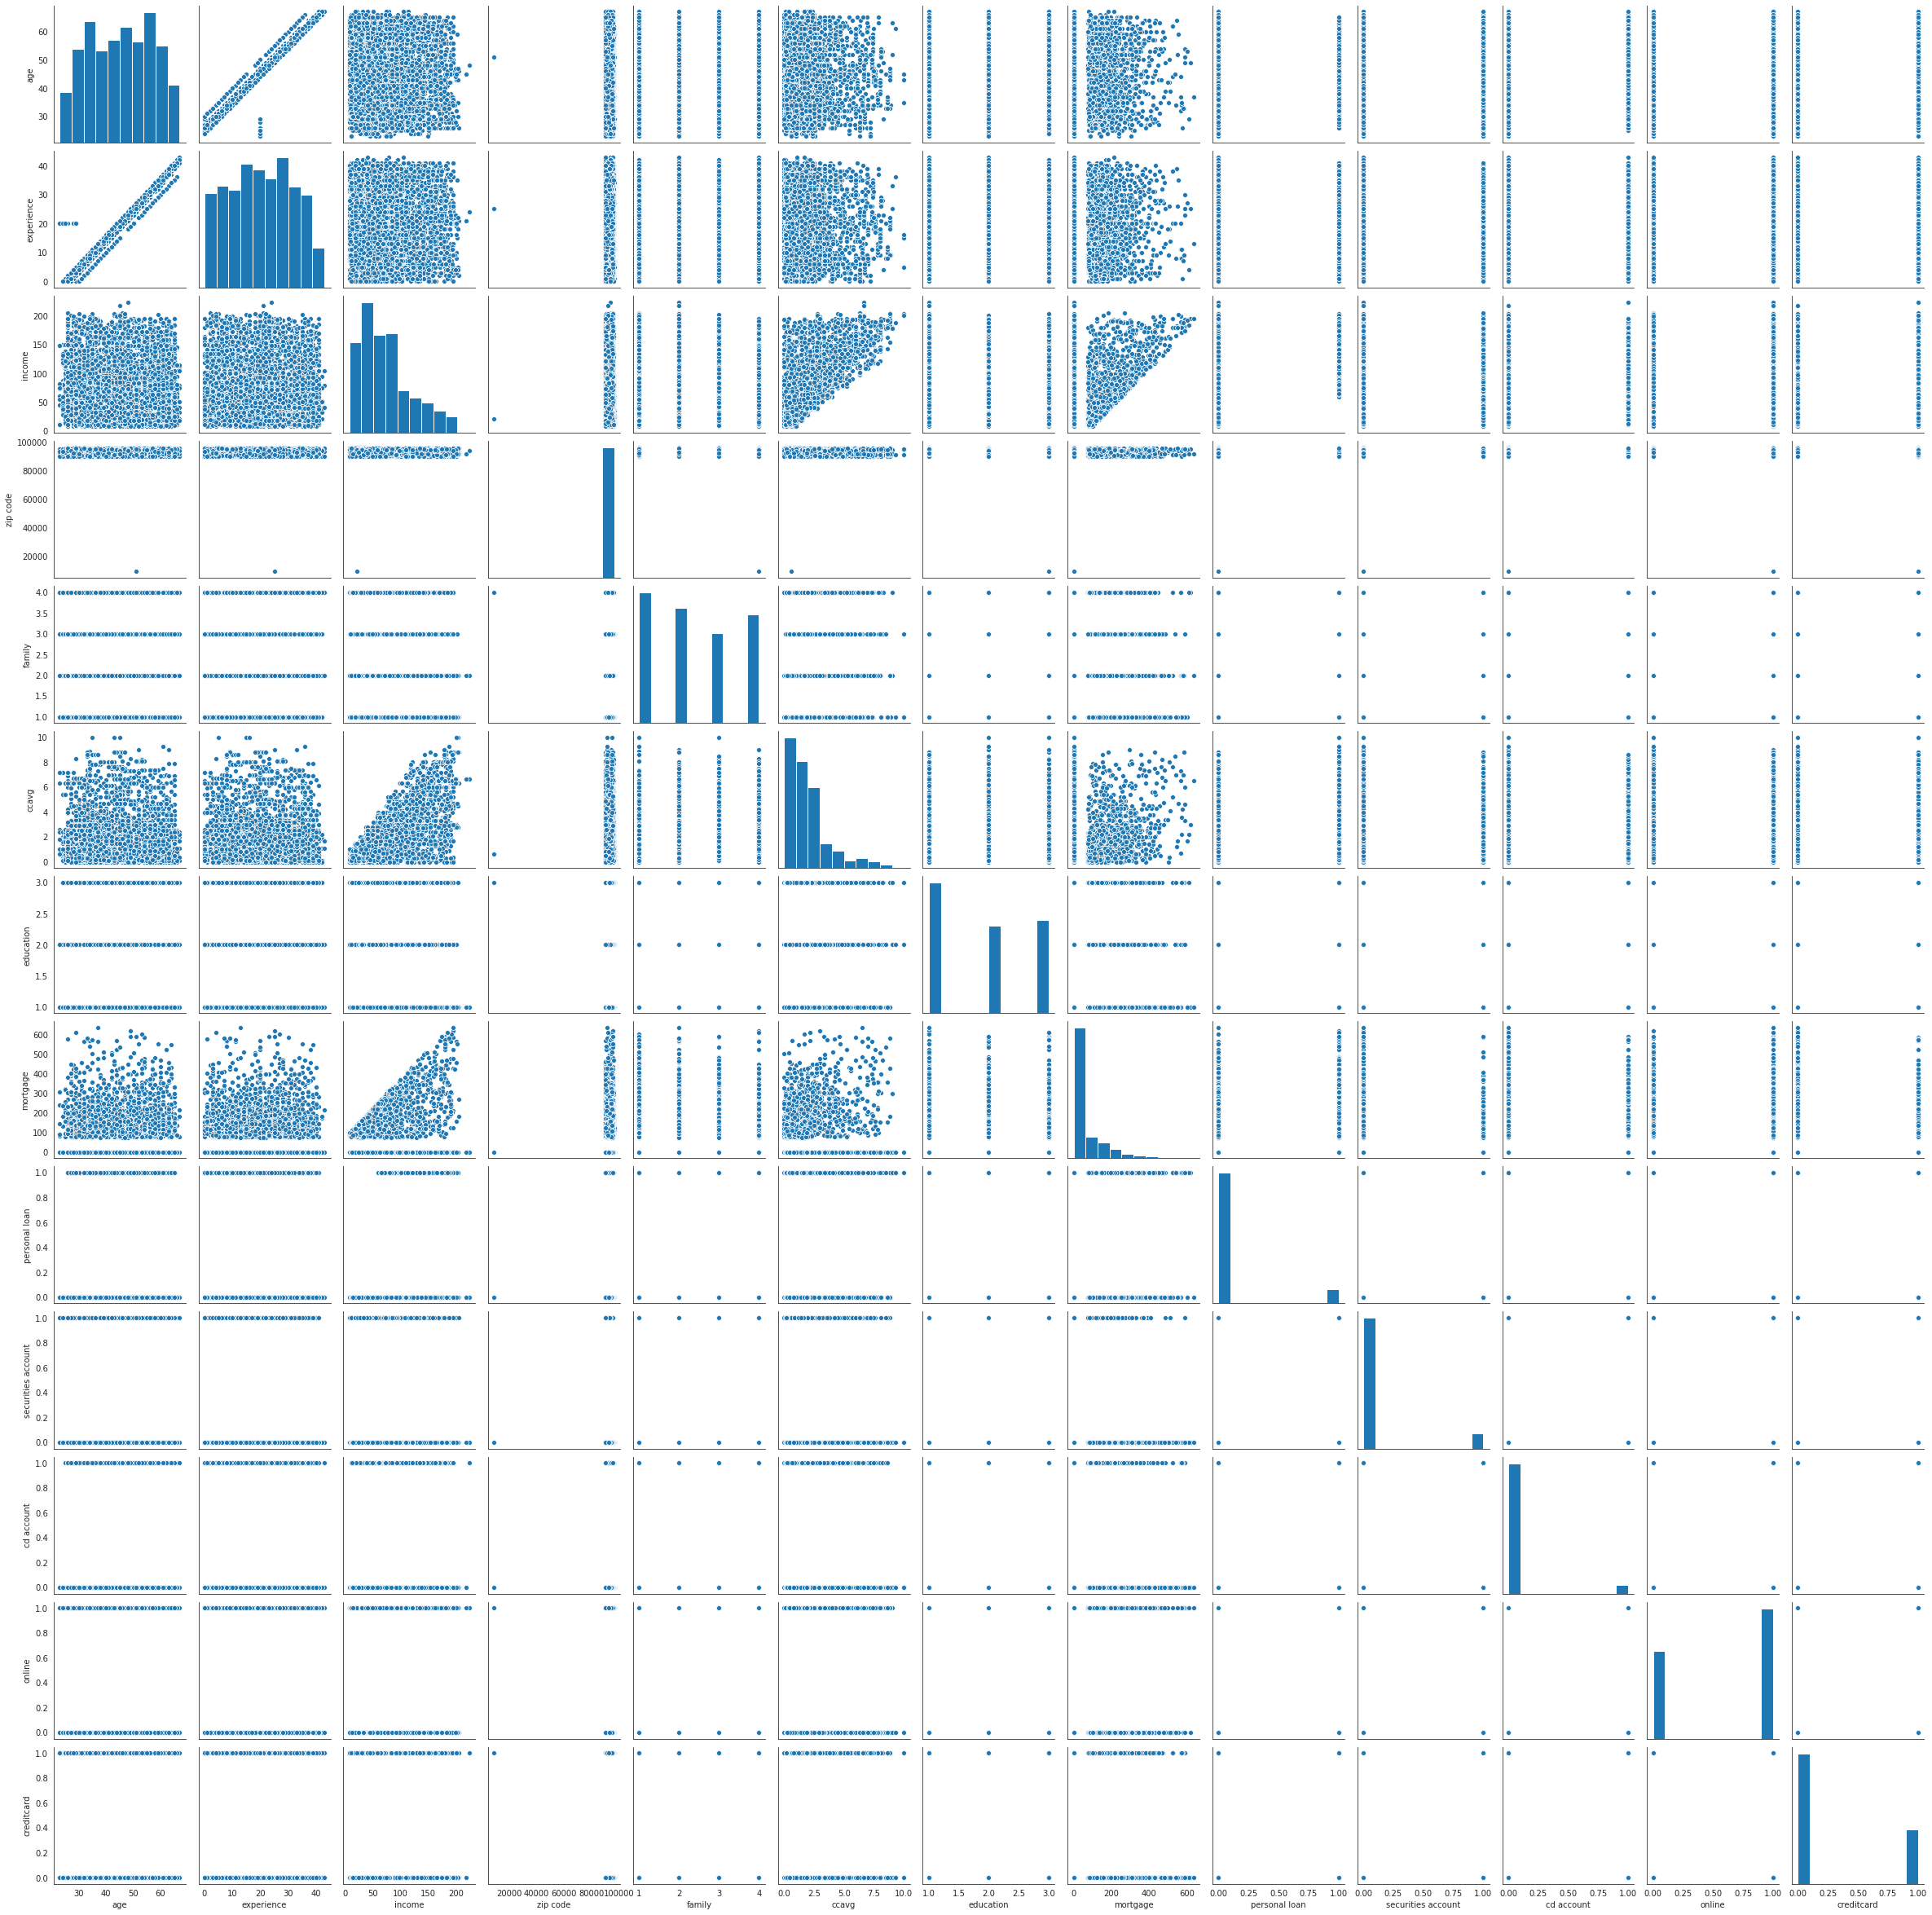

In [46]:
sns.pairplot(df, palette='coolwarm');

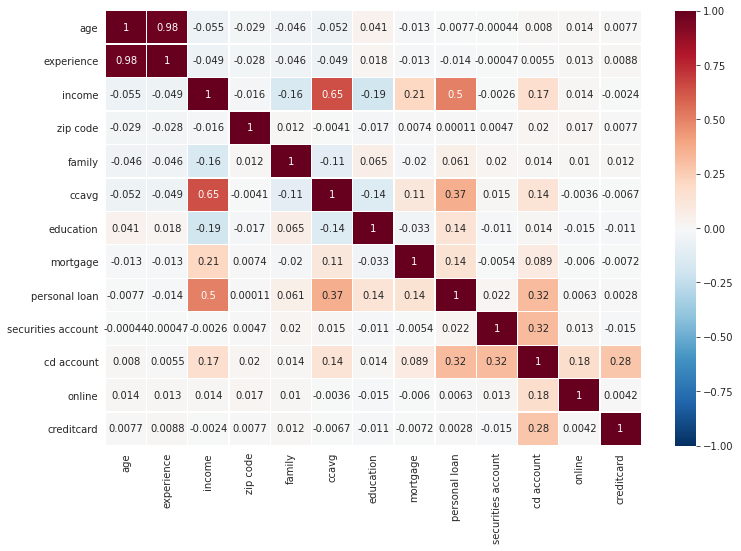

In [47]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, vmin=-1,vmax=1,center=0, cmap='RdBu_r',linecolor='white',linewidths=0.25);

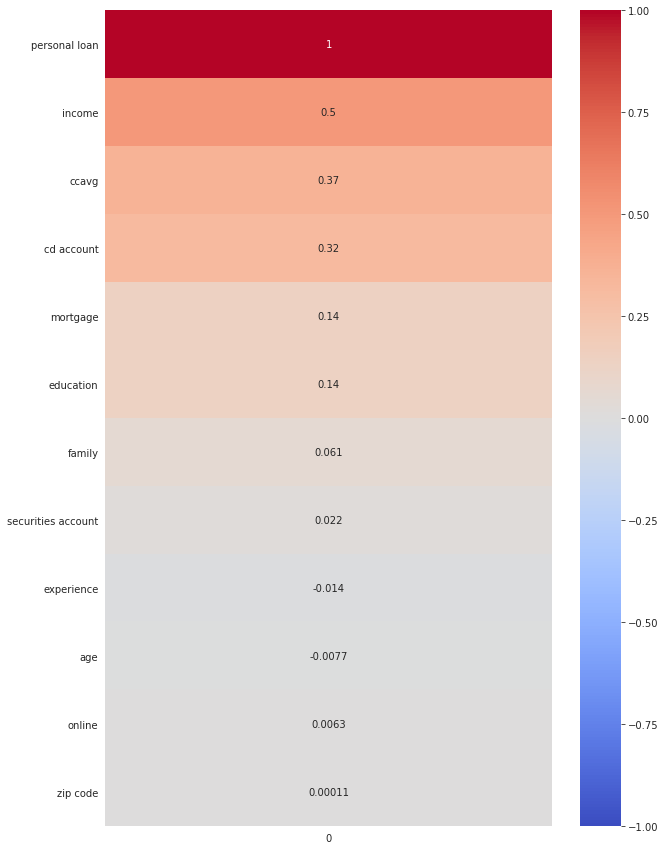

In [69]:
correlations = df.corrwith(df['personal loan']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,15))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

**4)Normalizing, Splitting the data into training and test set in the ratio of 70:30**

In [54]:
df['personal loan'].value_counts()

0    4520
1     480
Name: personal loan, dtype: int64

In [55]:
data_X = df.loc[:, df.columns != "personal loan"]
data_Y = df[["personal loan"]]

In [70]:
X_train, X_test ,y_train, y_test = train_test_split(data_X, data_Y, test_size=0.30, stratify=data_Y, random_state=0)
X_train.reset_index(drop=True, inplace=True);
X_test.reset_index(drop=True, inplace=True);
y_train.reset_index(drop=True, inplace=True);
y_test.reset_index(drop=True, inplace=True);

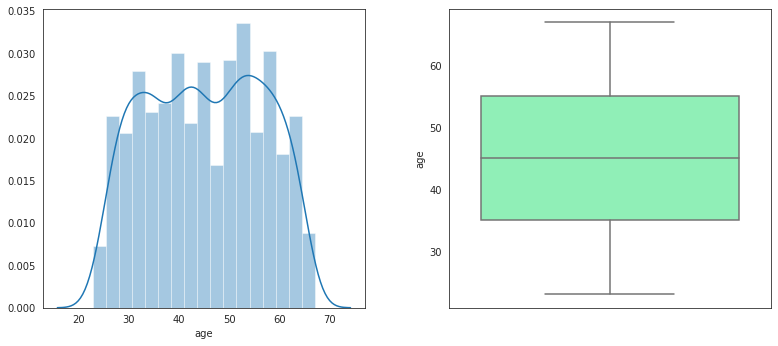

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.distplot(X_train["age"], ax=axes[0]);
sns.boxplot(X_train["age"], orient="vertical", ax=axes[1], palette = 'rainbow')

fig.tight_layout(pad=5.0)

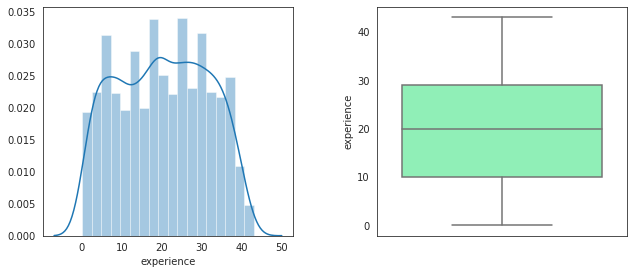

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(X_train["experience"], ax=axes[0]);
sns.boxplot(X_train["experience"], orient="vertical", palette="rainbow", ax=axes[1])

fig.tight_layout(pad=5.0)

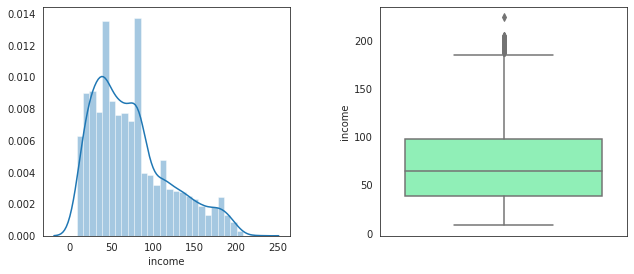

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(X_train["income"], ax=axes[0]);
sns.boxplot(X_train["income"], orient="v", palette="rainbow", ax=axes[1]);

fig.tight_layout(pad=5.0)

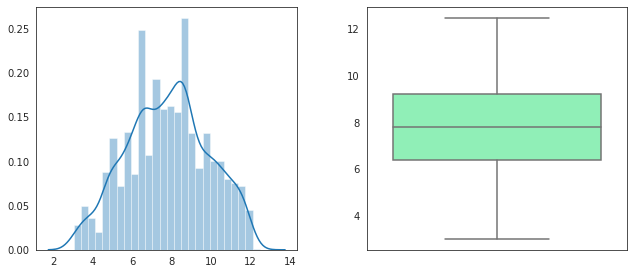

In [74]:
pt_income = PowerTransformer(method="yeo-johnson", standardize=False)

pt_income.fit(X_train["income"].values.reshape(-1, 1))

pti = pt_income.transform(X_train["income"].values.reshape(-1, 1))

fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(pti, ax=axes[0]);
sns.boxplot(pti, orient="v", palette="rainbow", ax=axes[1])

fig.tight_layout(pad=5.0)

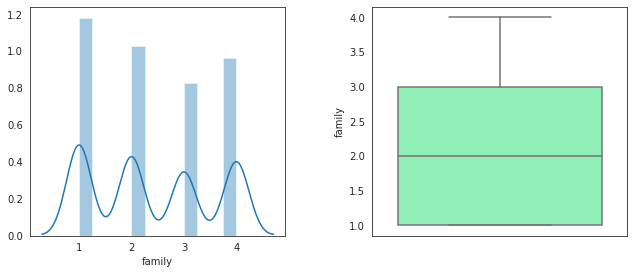

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(X_train["family"], ax=axes[0]);
sns.boxplot(X_train["family"], orient="v", palette="rainbow", ax=axes[1])

fig.tight_layout(pad=5.0)

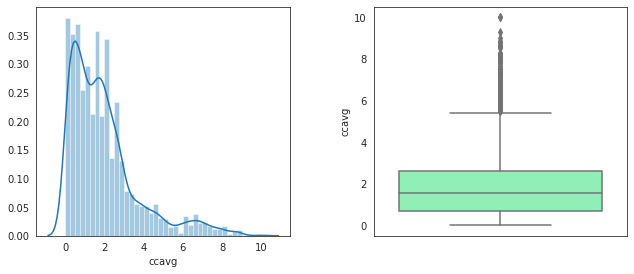

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(X_train["ccavg"], ax=axes[0]);
sns.boxplot(X_train["ccavg"], orient="v", palette="rainbow", ax=axes[1])

fig.tight_layout(pad=5.0)

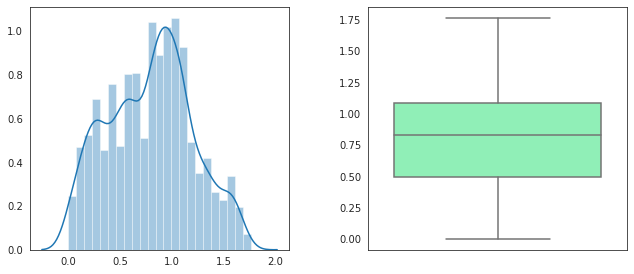

In [77]:
pt_ccavg = PowerTransformer(method="yeo-johnson", standardize=False)

pt_ccavg.fit(X_train["ccavg"].values.reshape(-1, 1))

ptc = pt_ccavg.transform(X_train["ccavg"].values.reshape(-1, 1))

fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(ptc, ax=axes[0]);
sns.boxplot(ptc, orient="v", palette="rainbow", ax=axes[1])

fig.tight_layout(pad=5.0)

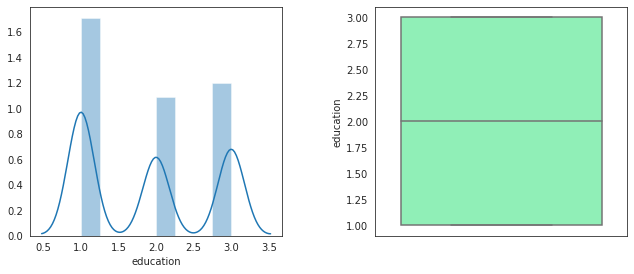

In [78]:

fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(X_train["education"], ax=axes[0]);
sns.boxplot(X_train["education"], orient="v", palette="rainbow", ax=axes[1])

fig.tight_layout(pad=5.0)

In [79]:
X_train["int_mortgage"] = pd.cut(X_train["mortgage"],
                                bins=[0,100,200,300,400,500,600,700],
                                labels=[0,1,2,3,4,5,6],
                                include_lowest=True)

X_train.drop("mortgage", axis=1, inplace=True)

X_test["int_mortgage"] = pd.cut(X_test["mortgage"],
                                bins=[0,100,200,300,400,500,600,700],
                                labels=[0,1,2,3,4,5,6],
                                include_lowest=True)

X_test.drop("mortgage", axis=1, inplace=True)

In [80]:
for ind, column in enumerate(X_train.columns):
    scaler = StandardScaler()

    # fit to the training data
    scaler.fit(X_train[[column]])

    # transform the training data
    np_array = scaler.transform(X_train[[column]])
    X_train.loc[:, column] = pd.Series(np_array.flatten())

    # transform the test data
    np_array = scaler.transform(X_test[[column]])
    X_test.loc[:, column] = pd.Series(np_array.flatten())

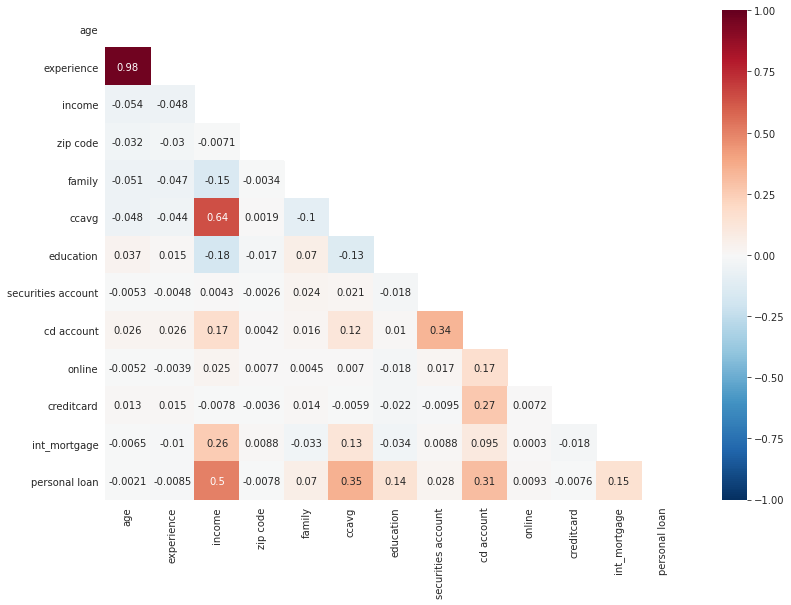

In [81]:

corr_matrix = pd.concat([X_train, y_train], axis=1).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

plt.figure(figsize=(13,9))
sns.heatmap(corr_matrix,annot=True,vmin=-1,vmax=1,center=0, mask=mask,cmap="RdBu_r");

In [82]:
X_train.drop("experience", axis=1, inplace=True)
X_test.drop("experience", axis=1, inplace=True)

**6) Logistic Regression**

In [83]:
logmodel = LogisticRegression();
logmodel.fit(X_train, y_train);

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [84]:
logmodel.score(X_train, y_train)

0.952

In [85]:
logmodel.score(X_test, y_test)

0.9513333333333334

In [86]:
logmodel_predict = logmodel.predict(X_test)

In [87]:
cm_logmodel = confusion_matrix(y_test, logmodel_predict, labels=[0,1])
print(cm_logmodel)

print(classification_report(y_test,logmodel_predict))

acc_score = accuracy_score(y_test, logmodel_predict)
f1_score = f1_score(y_test, logmodel_predict)
print("Accuracy Score  for Logistic Regression is: {}".format(acc_score * 100))
print("F1 Score  for Logistic Regression is: {}".format(f1_score * 100))

[[1337   19]
 [  54   90]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1356
           1       0.83      0.62      0.71       144

    accuracy                           0.95      1500
   macro avg       0.89      0.81      0.84      1500
weighted avg       0.95      0.95      0.95      1500

Accuracy Score  for Logistic Regression is: 95.13333333333334
F1 Score  for Logistic Regression is: 71.14624505928855


Accuracy Score  for Logistic Regression is: 95.13

**Building various other classification algorithms and compare their performance**

**K-Nearest Neighbours(KNN)**

In [94]:
k= KNeighborsClassifier(n_neighbors=21)

In [95]:
k.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [96]:
k.score(X_train, y_train)

0.9465714285714286

In [97]:
k.score(X_test, y_test)

0.9493333333333334

In [98]:
kpredict = k_model.predict(X_test)

In [104]:
cm_knn = confusion_matrix(y_test, kpredict)
print(cm_knn)

print(classification_report(y_test, kpredict))

acc_score_K = accuracy_score(y_test, kpredict)

print("Accuracy Score  for KNN Classifier is: {}".format(accuracy_score(y_test, kpredict) * 100))
print("F1 Score  for KNN Classifier is: {}".format(f1_score(y_test, kpredict) * 100))

f1_score_K = f1_score(y_test, kpredict)

[[1352    4]
 [  72   72]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1356
           1       0.95      0.50      0.65       144

    accuracy                           0.95      1500
   macro avg       0.95      0.75      0.81      1500
weighted avg       0.95      0.95      0.94      1500

Accuracy Score  for KNN Classifier is: 94.93333333333334


TypeError: ignored

3)Naive Bayes Model

In [106]:
nb = GaussianNB()

In [107]:
nb.fit(X_train, y_train);

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [109]:
nb.score(X_train, y_train)

0.88

In [110]:
nb_model.score(X_test, y_test)

NameError: ignored

In [ ]:
cm_nb_model = confusion_matrix(y_test, nb_predict)
print(cm_nb_model)

print(classification_report(y_test, nb_predict))

acc_score_nb = accuracy_score(y_test, nb_predict)
f1_score_nb = f1_score(y_test, nb_predict)

print("Accuracy Score  for Decision Tree Classifier is: {}".format(acc_score_nb * 100))
print("F1 Score  for Decision Tree Classifier is: {}".format(f1_score_nb * 100))

4)Random Forrest Classifier

In [114]:
rfmodel = RandomForestClassifier(max_depth=2)

In [115]:
rfmodel.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [118]:
rfmodel.score(X_train, y_train)

0.9257142857142857

In [119]:
rfmodel.score(X_test, y_test)

0.922

In [120]:
rf_predict = rfmodel.predict(X_test)

In [141]:
cm_rfmodel = confusion_matrix(y_test, rf_predict)
print(cm_rfmodel)

print(classification_report(y_test, rf_predict))

acc_score_rf = accuracy_score(y_test, rf_predict)
f1_score_rf = f1_score(y_test, rf_predict)

print("Accuracy Score  for  Random Forest Classifier is: {}".format(acc_score_rf * 100))
print("F1 Score  for  Random Forest Classifier is: {}".format(f1_score_rf * 100))

[[1356    0]
 [ 117   27]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1356
           1       1.00      0.19      0.32       144

    accuracy                           0.92      1500
   macro avg       0.96      0.59      0.64      1500
weighted avg       0.93      0.92      0.90      1500



TypeError: ignored

**Decision Tree Classifier**

In [124]:
dtmodel = DecisionTreeClassifier()

In [125]:
dtmodel.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [126]:
DecisionTreeClassifier()

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [127]:
dtmodel.score(X_train, y_train)

1.0

In [128]:
dtmodel.score(X_test, y_test)

0.9813333333333333

In [129]:
dt_predict = dtmodel.predict(X_test)

In [140]:
cm_dtmodel = confusion_matrix(y_test, dt_predict)
print(cm_dtmodel)

print(classification_report(y_test, dt_predict))

acc_score_dt = accuracy_score(y_test, dt_predict)
f1_score_dt = f1_score(y_test, dt_predict)
``
print("Accuracy Score  for  Random Forest Classifier is: {}".format(accuracy_score*100))
print("F1 Score  for  Random Forest Classifier is: {}".format(f1_score_dt*100))

[[1341   15]
 [  13  131]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.90      0.91      0.90       144

    accuracy                           0.98      1500
   macro avg       0.94      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500



TypeError: ignored

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

The Mean and Standard Deviation for the boxplot of LR is: 0.906400 (0.006800)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

The Mean and Standard Deviation for the boxplot of KNN is: 0.899200 (0.008998)
The Mean and Standard Deviation for the boxplot of NB is: 0.886800 (0.009042)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

The Mean and Standard Deviation for the boxplot of RF is: 0.987600 (0.003555)
The Mean and Standard Deviation for the boxplot of DT is: 0.982600 (0.005517)


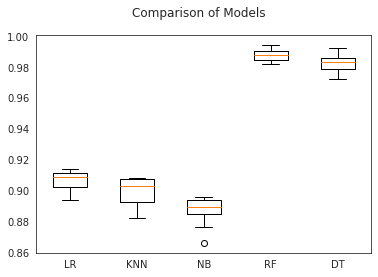

In [131]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10);
	cv_results = cross_val_score(model, data_X, data_Y, cv=kfold, scoring=scoring);
	results.append(cv_results);
	names.append(name);
	msg = "The Mean and Standard Deviation for the boxplot of %s is: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# Boxplot for algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison of Models')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [136]:
PRED_PROB_LOG_RAW=logmodel.predict_proba(X_test)
PRED_PROB_KNN_RAW=k.predict_proba(X_test)
PRED_PROB_NB_RAW=nb.predict_proba(X_test)
PRED_PROB_RF_RAW=rfmodel.predict_proba(X_test)
PRED_PROB_DT_RAW=dtmodel.predict_proba(X_test)

In [137]:
fpr1, tpr1, thresh1 = roc_curve(y_test, PRED_PROB_LOG_RAW[:,1], pos_label=1)
fpr2,tpr2,thresh2 = roc_curve(y_test, PRED_PROB_KNN_RAW[:,1], pos_label=1)
fpr3,tpr3,thresh3 = roc_curve(y_test, PRED_PROB_NB_RAW[:,1], pos_label=1)
fpr4,tpr4,thresh4 = roc_curve(y_test, PRED_PROB_RF_RAW[:,1], pos_label=1)
fpr5,tpr5,thresh5 = roc_curve(y_test, PRED_PROB_DT_RAW[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


AUC_LOG_RAW = roc_auc_score(y_test,PRED_PROB_LOG_RAW[:,1])
AUC_KNN_RAW=roc_auc_score(y_test,PRED_PROB_KNN_RAW[:,1])
AUC_NB_RAW=roc_auc_score(y_test,PRED_PROB_NB_RAW[:,1])
AUC_RF_RAW=roc_auc_score(y_test,PRED_PROB_RF_RAW[:,1])
AUC_DT_RAW=roc_auc_score(y_test,PRED_PROB_DT_RAW[:,1])

AUC_SCORES=pd.array([AUC_LOG_RAW, AUC_KNN_RAW, AUC_NB_RAW, AUC_RF_RAW, AUC_DT_RAW])

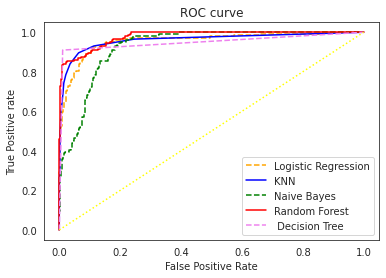

In [138]:
plt.plot(fpr1,tpr1,linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2,tpr2,linestyle='solid',color='blue', label='KNN')
plt.plot(fpr3,tpr3,linestyle='--',color='Green', label='Naive Bayes')
plt.plot(fpr4,tpr4,linestyle='solid',color='Red', label='Random Forest')
plt.plot(fpr5,tpr5,linestyle='--',color='violet',label=' Decision Tree')


plt.plot(p_fpr, p_tpr, linestyle=':', color='Yellow')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

Conclusion:
    
    
The Bank requires the analysis of dataset of their customers with the  goal to predict the likelihood of a liability customer buying personal loans.The bank has a growing customer base. The bank wants to increase borrowers (asset customers) base to bring in more loan business and earn more through the interest on loans. This ML Project provides the bank the analysis done for turning liability customers into asset customers.